<a href="https://colab.research.google.com/github/sathamhussain7/project/blob/main/Project2_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

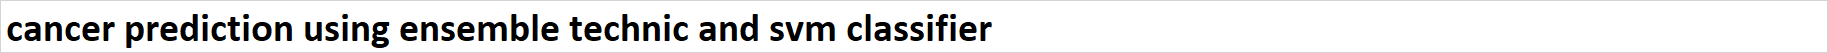

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load the data

In [2]:
df=pd.read_csv('/content/cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**clean the data**

In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df=df.drop_duplicates()
df.shape

(569, 33)

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
df = df.drop(['Unnamed: 32'], axis=1)

In [4]:
df=df.drop(['id'],axis=1)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**encode the data**

In [6]:
df.diagnosis=df.diagnosis.map({'B':0,'M':1})

**plotting**

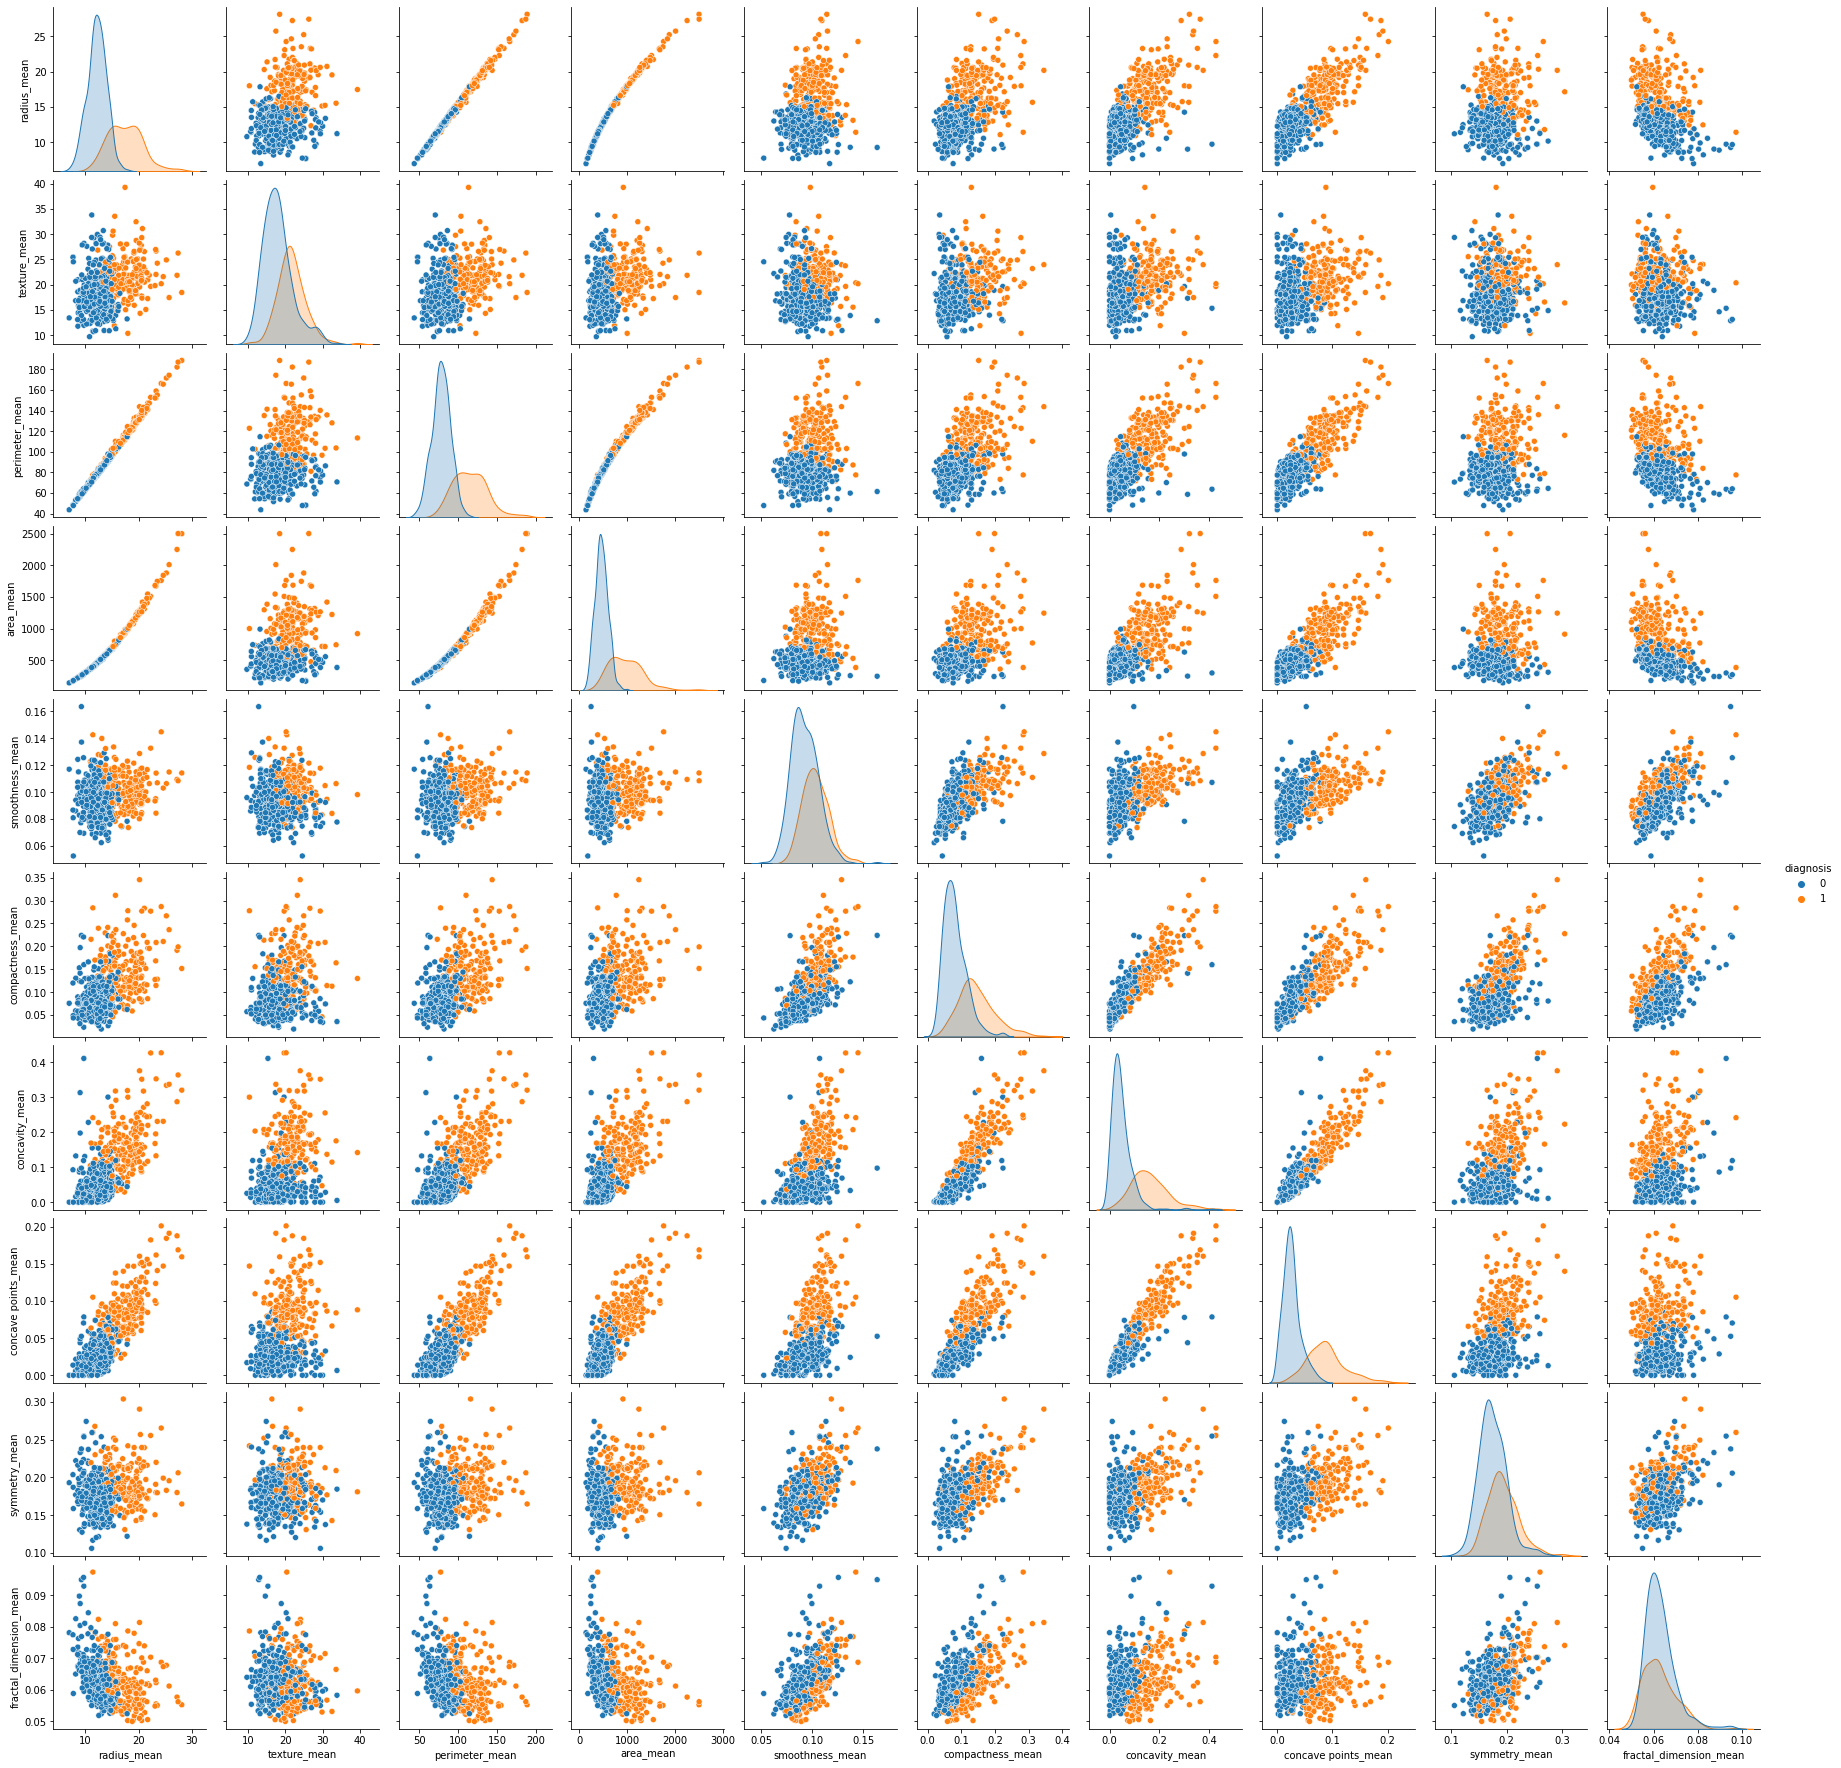

In [ ]:
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])

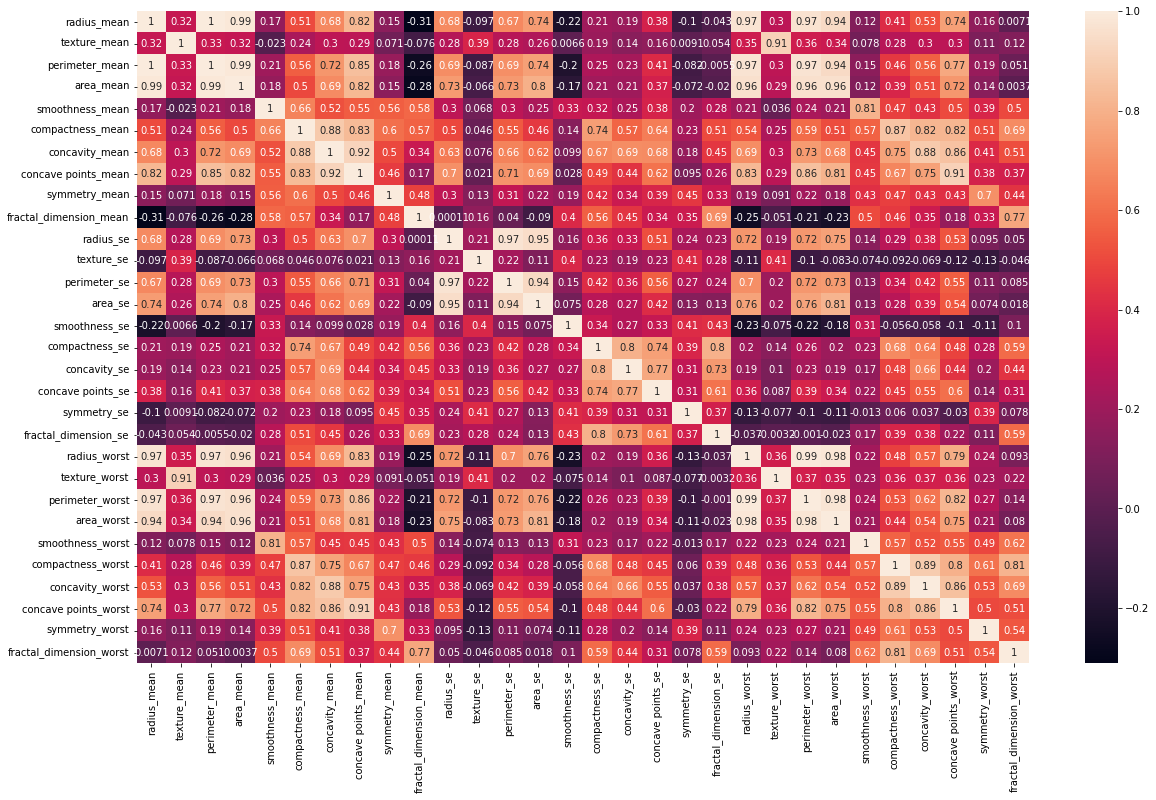

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df.drop(['diagnosis'], axis =1).corr(), annot=True)

**splitting the data**

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['diagnosis'], axis = 1).values
y = df['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X_train.shape,X_test.shape

((426, 30), (143, 30))

**applying ensemble technic**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(n_estimators=100, max_depth = 5, max_features='sqrt', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', random_state=0)

In [ ]:
y_pred=rf.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
auc_score=roc_auc_score(y_pred,y_test)


In [ ]:
auc_score

0.9590909090909091

**plot tree**

In [ ]:
from sklearn import tree

In [ ]:
from sklearn.tree import export_graphviz
import pydot
X_col = df.drop(['diagnosis'], axis = 1)
feature_list = list(X_col.columns)

# Pull out one tree from the forest
tree = rf.estimators_[16]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png');

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: perimeter_worst      Importance: 0.18
Variable: concave points_worst Importance: 0.14
Variable: radius_worst         Importance: 0.11
Variable: concave points_mean  Importance: 0.09
Variable: perimeter_mean       Importance: 0.06
Variable: area_worst           Importance: 0.06
Variable: area_mean            Importance: 0.05
Variable: concavity_mean       Importance: 0.05
Variable: area_se              Importance: 0.04
Variable: radius_mean          Importance: 0.03
Variable: texture_worst        Importance: 0.03
Variable: texture_mean         Importance: 0.02
Variable: radius_se            Importance: 0.02
Variable: concavity_worst      Importance: 0.02
Variable: smoothness_mean      Importance: 0.01
Variable: perimeter_se         Importance: 0.01
Variable: compactness_se       Importance: 0.01
Variable: concave points_se    Importance: 0.01
Variable: fractal_dimension_se Importance: 0.01
Variable: smoothness_worst     Importance: 0.01
Variable: compactness_worst    Importanc

In [ ]:
# New random forest with only the top most important variables
rf_most_important = RandomForestClassifier(n_estimators= 100, max_depth = 5, max_features='auto')


important_indices = ['perimeter_worst',
                     'radius_worst',
                     'perimeter_mean',
                     'concave points_worst',
                     'concave points_mean',
                     'area_worst',
                     'concavity_mean',
                     'area_mean',
                     'radius_mean',
                     'area_se',
                     'concavity_worst',
                     'radius_se',
                     'texture_worst',
                     'texture_mean',
                     'smoothness_mean',
                     'compactness_mean',
                     'perimeter_se',
                     'smoothness_worst',
                     'compactness_worst',
                     'symmetry_worst',
                     'fractal_dimension_worst']
                    
X = df.loc[:, important_indices].values
y = df['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Train the random forest
rf_most_important.fit(X_train, y_train)

predictions = rf_most_important.predict(X_test)

In [ ]:
auc_score = roc_auc_score(predictions, y_test)
auc_score

0.9633200354609928

**Applying SVM model**

1.rbf kernal

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in lst:
    clf = SVC(C = i, kernel ='rbf')
    clf.fit(X_train, y_train)
    print("C value  : " , i, " train score : ", clf.score(X_train,y_train) , " score : ", np.mean(cross_val_score(clf, X_train, y_train, cv=10))) 

C value  :  0.1  train score :  0.903755868544601  score :  0.9039867109634552
C value  :  0.2  train score :  0.9154929577464789  score :  0.9109634551495016
C value  :  0.3  train score :  0.9178403755868545  score :  0.9179955703211518
C value  :  0.4  train score :  0.92018779342723  score :  0.9203765227021041
C value  :  0.5  train score :  0.9225352112676056  score :  0.9179955703211518
C value  :  0.6  train score :  0.9225352112676056  score :  0.9203211517165005
C value  :  0.7  train score :  0.9272300469483568  score :  0.9203211517165005
C value  :  0.8  train score :  0.9295774647887324  score :  0.9203211517165005
C value  :  0.9  train score :  0.931924882629108  score :  0.9272978959025471
C value  :  1  train score :  0.931924882629108  score :  0.9272978959025471


In [12]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

In [13]:
classifier1 = SVC(C=0.9, kernel ='rbf', random_state = 0)
classifier1.fit(X_train, y_train) 

y_pred1 = classifier1.predict(X_test)
AUC_score1 = roc_auc_score(y_pred1, y_test)
AUC_score1

0.895226355894218

2.sigmoid kernal

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in lst:
    clf = SVC(C = i, kernel ='sigmoid')
    clf.fit(X_train, y_train)
    print("C value  : " , i, " train score : ", clf.score(X_train,y_train) , " score : ", np.mean(cross_val_score(clf, X_train, y_train, cv=10))) 

C value  :  0.1  train score :  0.636150234741784  score :  0.6362126245847177
C value  :  0.2  train score :  0.636150234741784  score :  0.6362126245847177
C value  :  0.3  train score :  0.636150234741784  score :  0.6362126245847177
C value  :  0.4  train score :  0.6408450704225352  score :  0.6362126245847177
C value  :  0.5  train score :  0.6244131455399061  score :  0.6408084163898119
C value  :  0.6  train score :  0.5446009389671361  score :  0.5867663344407531
C value  :  0.7  train score :  0.5093896713615024  score :  0.5400885935769656
C value  :  0.8  train score :  0.49061032863849763  score :  0.5093023255813953
C value  :  0.9  train score :  0.4694835680751174  score :  0.4833333333333333
C value  :  1  train score :  0.47183098591549294  score :  0.46926910299003327


In [15]:
classifier2 = SVC(kernel ='sigmoid')
classifier2.fit(X_train, y_train) 

y_pred2 = classifier2.predict(X_test)
AUC_score2 = roc_auc_score(y_pred2, y_test)
AUC_score2

0.39344086021505376

3.polynominal kernal

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in lst:
    clf = SVC(C = i, kernel ='poly')
    clf.fit(X_train, y_train)
    print("C value  : " , i, " train score : ", clf.score(X_train,y_train) , " score : ", np.mean(cross_val_score(clf, X_train, y_train, cv=10))) 

C value  :  0.1  train score :  0.8990610328638498  score :  0.8993355481727574
C value  :  0.2  train score :  0.9084507042253521  score :  0.9086378737541528
C value  :  0.3  train score :  0.9178403755868545  score :  0.9086378737541528
C value  :  0.4  train score :  0.9225352112676056  score :  0.9156699889258029
C value  :  0.5  train score :  0.9295774647887324  score :  0.9272978959025471
C value  :  0.6  train score :  0.931924882629108  score :  0.9272978959025471
C value  :  0.7  train score :  0.9295774647887324  score :  0.9272978959025471
C value  :  0.8  train score :  0.9295774647887324  score :  0.9272978959025471
C value  :  0.9  train score :  0.9295774647887324  score :  0.9272978959025471
C value  :  1  train score :  0.9295774647887324  score :  0.9272978959025471


In [17]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in degrees:
  classifier3 = SVC(C=1, kernel ='poly', degree = i)
  classifier3.fit(X_train, y_train) 
  print("Degrees value  : " , i, " train score : ", classifier3.score(X_train,y_train) , " score : ", np.mean(cross_val_score(classifier3, X_train, y_train, cv=10))) 

Degrees value  :  1  train score :  0.92018779342723  score :  0.9179955703211518
Degrees value  :  2  train score :  0.9295774647887324  score :  0.929623477297896
Degrees value  :  3  train score :  0.9295774647887324  score :  0.9272978959025471
Degrees value  :  4  train score :  0.9295774647887324  score :  0.929623477297896
Degrees value  :  5  train score :  0.9295774647887324  score :  0.9249723145071982
Degrees value  :  6  train score :  0.9248826291079812  score :  0.9203211517165005
Degrees value  :  7  train score :  0.92018779342723  score :  0.9179955703211518
Degrees value  :  8  train score :  0.9225352112676056  score :  0.9179955703211518
Degrees value  :  9  train score :  0.92018779342723  score :  0.9156699889258029
Degrees value  :  10  train score :  0.9225352112676056  score :  0.9156146179401994


In [18]:
classifier3 = SVC(C=1, kernel ='poly', degree = 5)
classifier3.fit(X_train, y_train) 

y_pred3 = classifier3.predict(X_test)
AUC_score3 = roc_auc_score(y_pred3, y_test)
AUC_score3

0.8873744619799139

4.linear kernal

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in lst:
    clf = SVC(C = i, kernel ='linear')
    clf.fit(X_train, y_train)
    print("C value  : " , i, " train score : ", clf.score(X_train,y_train) , " score : ", np.mean(cross_val_score(clf, X_train, y_train, cv=10))) 

C value  :  0.1  train score :  0.9741784037558685  score :  0.9694352159468439
C value  :  0.2  train score :  0.9741784037558685  score :  0.967109634551495
C value  :  0.3  train score :  0.9741784037558685  score :  0.967109634551495
C value  :  0.4  train score :  0.9765258215962441  score :  0.9694905869324474
C value  :  0.5  train score :  0.9765258215962441  score :  0.9694905869324474
C value  :  0.6  train score :  0.9765258215962441  score :  0.9694905869324474
C value  :  0.7  train score :  0.9765258215962441  score :  0.9694905869324474
C value  :  0.8  train score :  0.9765258215962441  score :  0.9694905869324474
C value  :  0.9  train score :  0.9765258215962441  score :  0.9694905869324474
C value  :  1  train score :  0.9765258215962441  score :  0.969545957918051


In [20]:
classifier4 = SVC(C=1,kernel ='linear')
classifier4.fit(X_train, y_train) 

y_pred4 = classifier4.predict(X_test)
AUC_score4 = roc_auc_score(y_pred4, y_test)
AUC_score4

0.9385143570536829

**CONCLUSION**

From the above four kernels of SVM, linear kernel with C=1 gives the highest AUC score of 0.93

Random forest classifier gives AUC score of 0.96

---


